## TensorRT
TensorRT is a library delivered by NVIDIA.

It allows for efficient inference computation of neural networks models.

Library delivers many tools like model optimization or pruning.

Access to mentioned functionality is available for may popular DNN frameworks like PyTorch or Tensor-Flow.

Presented notebook shows usage of library on the example of semantic segmentation.

The goal of semantic segmentation is to assign a class (in some cases classes) for each pixel of image.

Pixels that are the part of the object(s) of the same type/class should have the same class.

For that task for a single image we need to assign array of the same size with class ids or 

n boolean arrays - each represents separate class.     

Your task is to design Deep Neural Network architecture to achieve 

Binary Accuracy metric higher than 0.99 on validation dataset.


Helpful links:
- U-net https://arxiv.org/pdf/1505.04597v1.pdf
- Semantic segmentation datasets - https://paperswithcode.com/task/semantic-segmentation
- Autoencoders - https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
- Autoencoders - https://en.wikipedia.org/wiki/Autoencoder

Install required packages (if not installed):

In [23]:
! pip install nvidia-pyindex nvidia-tensorrt tensorflow
! pip install torch-tensorrt==1.3.0 --find-links https://github.com/pytorch/TensorRT/releases/expanded_assets/v1.3.0
! pip install git+https://github.com/LukeTonin/simple-deep-learning --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
Looking in links: https://github.com/pytorch/TensorRT/releases/expanded_assets/v1.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
  Cloning https://github.com/LukeTonin/simple-deep-learning to /tmp/pip-req-build-lgfssesp
  Running command git clone --filter=blob:none --quiet https://github.com/LukeTonin/simple-deep-learning /tmp/pip-req-build-lgfssesp
  Resolved https://github.com/LukeTonin/simple-deep-learning to commit 18005bf4cfe0d67470a0b80b763fb0565c8cfcac
  Preparing metadata (setup.py) ... done


In [24]:
from simple_deep_learning.mnist_extended.semantic_segmentation import create_semantic_segmentation_dataset
import matplotlib.pyplot as plt
import numpy as np
import torch
import local_utils as lu

In [25]:
BATCH_SIZE = 32
NUM_OF_CLASSES = 10
NUM_OF_TRAINING_SAMPLES = BATCH_SIZE * 32
NUM_OF_TEST_SAMPLES = BATCH_SIZE * 4
INPUT_WIDTH = 64
INPUT_HEIGHT = 64
INPUT_CHANNELS = 1
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [26]:
np.random.seed(0)
train_x, train_y, _, _ = create_semantic_segmentation_dataset(NUM_OF_TRAINING_SAMPLES, 1, (INPUT_WIDTH, INPUT_HEIGHT), 2, 9, NUM_OF_CLASSES, 0.1)
np.random.seed(5)
_, _, test_x, test_y = create_semantic_segmentation_dataset(1, NUM_OF_TEST_SAMPLES, (INPUT_WIDTH, INPUT_HEIGHT), 2, 9, NUM_OF_CLASSES, 0.1)
train_x = torch.from_numpy(np.moveaxis(train_x,-1, 1)).to(torch.float32)
train_y = torch.from_numpy(np.moveaxis(train_y,-1, 1)).to(torch.float32)
test_x = torch.from_numpy(np.moveaxis(test_x,-1, 1)).to(torch.float32)
test_y = torch.from_numpy(np.moveaxis(test_y,-1, 1)).to(torch.float32)
print(train_y.shape)
print(train_x.shape)
print(test_y.shape)
print(test_x.shape)

train_loader = lu.CustomDataLoader(train_x, train_y, batch_size=BATCH_SIZE)
test_loader = lu.CustomDataLoader(test_x, test_y, batch_size=BATCH_SIZE)
eval_loader = lu.CustomDataLoader(test_x, test_y, batch_size=1)

torch.Size([1024, 10, 64, 64])
torch.Size([1024, 1, 64, 64])
torch.Size([128, 10, 64, 64])
torch.Size([128, 1, 64, 64])


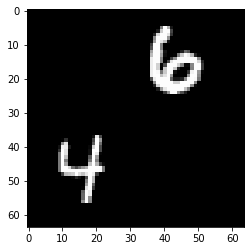

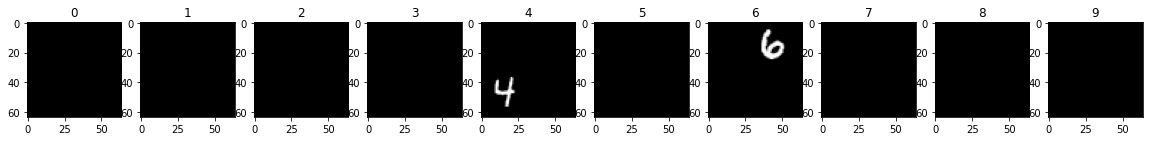

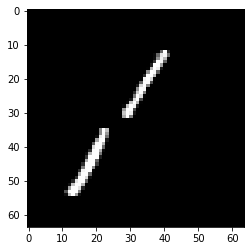

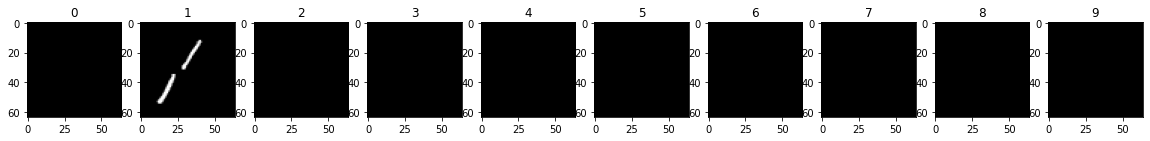

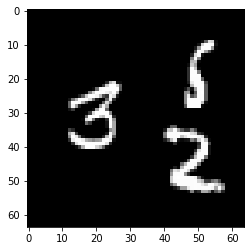

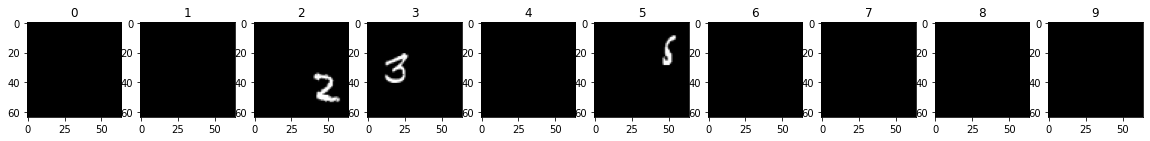

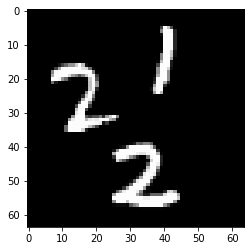

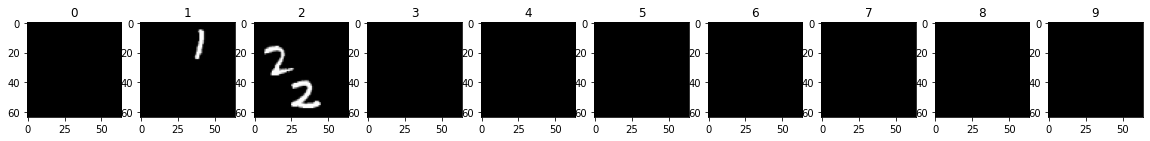

In [27]:
for X, Y in train_loader:
    for i in range(min(4, train_loader.batch_size)):
        plt.gray()
        plt.imshow(X[i][0])
        plt.show()
        fig, axes = plt.subplots(1, Y[i].shape[0], figsize=(20,2))
        axes = np.array(axes).flatten().tolist()
        for cls, (a, y) in enumerate(zip(axes, Y[i])):
            a.imshow(y)
            a.set_title(str(cls))
        plt.show()
    break

In [28]:
criterion = lu.BinaryCrossEntropyLoss(1)
metric = lu.BinaryAccuracy()
from torch import nn
# DEFINE HERE YOUR MODEL :)




class MyModel(nn.Module):
    def __init__(self,input_shape,num_of_classes=10,):
      super().__init__()
      self.net = nn.Sequential(
                                nn.Conv2d(input_shape[0], 16, 3, padding=1),
                                nn.BatchNorm2d(16),
                                nn.ReLU(),
                                nn.Conv2d(16, 32, 3, padding=1),
                                nn.BatchNorm2d(32),
                                nn.ReLU(),
                                nn.Conv2d(32, 64, 3, padding=1),
                                nn.BatchNorm2d(64),
                                nn.ReLU(),
                                nn.Conv2d(64, 64, 3, padding=1),
                                nn.BatchNorm2d(64),
                                nn.ReLU(),
                                nn.Conv2d(64, 64, 3, padding=1),
                                nn.BatchNorm2d(64), 
                                nn.ReLU(),
                                nn.Conv2d(64, 64, 3, padding=1),
                                nn.BatchNorm2d(64), 
                                nn.ReLU(),
                                nn.Conv2d(64, 128, 3, padding=1),
                                nn.BatchNorm2d(128), 
                                nn.ReLU(),
                                nn.Conv2d(128, 128, 3, padding=1),
                                nn.BatchNorm2d(128), 
                                nn.ReLU(),
                                nn.Conv2d(128, 64, 3, padding=1),
                                nn.BatchNorm2d(64), 
                                nn.ReLU(),
                                nn.Conv2d(64, 32, 3, padding=1),
                                nn.BatchNorm2d(32), 
                                nn.ReLU(),  
                                nn.Conv2d(32, num_of_classes, 1),
                                nn.Sigmoid(),
                                )

    def forward(self, x):
        x = self.net(x)
        return x
###########

net = MyModel((INPUT_CHANNELS, INPUT_HEIGHT, INPUT_WIDTH), num_of_classes=NUM_OF_CLASSES)
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [29]:
net, history = lu.training(net,
                           train_loader,
                           test_loader,
                           criterion,
                           metric,
                           optimizer,
                           update_period=2,
                           epoch_max=60,
                           device=device)
lu.plot_history(history)

Epoch 1 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [04:02<00:00,  7.57s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 1: loss=0.7327 metric=0.6176 val_loss=0.7073 val_metric=0.7028
Epoch 1 / 60: FINISHED

Epoch 2 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [04:04<00:00,  7.63s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 2: loss=0.6968 metric=0.6771 val_loss=0.6857 val_metric=0.7026
Epoch 2 / 60: FINISHED

Epoch 3 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:53<00:00,  7.29s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.89s/it]


After epoch 3: loss=0.6744 metric=0.7078 val_loss=0.6646 val_metric=0.7392
Epoch 3 / 60: FINISHED

Epoch 4 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [04:00<00:00,  7.50s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.90s/it]


After epoch 4: loss=0.6560 metric=0.7601 val_loss=0.6478 val_metric=0.7795
Epoch 4 / 60: FINISHED

Epoch 5 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.33s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.90s/it]


After epoch 5: loss=0.6397 metric=0.8003 val_loss=0.6335 val_metric=0.8193
Epoch 5 / 60: FINISHED

Epoch 6 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.36s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


After epoch 6: loss=0.6261 metric=0.8290 val_loss=0.6201 val_metric=0.8376
Epoch 6 / 60: FINISHED

Epoch 7 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:56<00:00,  7.38s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 7: loss=0.6146 metric=0.8440 val_loss=0.6129 val_metric=0.8478
Epoch 7 / 60: FINISHED

Epoch 8 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.35s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 8: loss=0.6036 metric=0.8722 val_loss=0.6015 val_metric=0.8861
Epoch 8 / 60: FINISHED

Epoch 9 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.34s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.89s/it]


After epoch 9: loss=0.5933 metric=0.8909 val_loss=0.5917 val_metric=0.8932
Epoch 9 / 60: FINISHED

Epoch 10 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:53<00:00,  7.30s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 10: loss=0.5833 metric=0.8989 val_loss=0.5847 val_metric=0.8997
Epoch 10 / 60: FINISHED

Epoch 11 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:53<00:00,  7.30s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


After epoch 11: loss=0.5735 metric=0.9098 val_loss=0.5723 val_metric=0.9151
Epoch 11 / 60: FINISHED

Epoch 12 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:53<00:00,  7.30s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


After epoch 12: loss=0.5637 metric=0.9330 val_loss=0.5630 val_metric=0.9389
Epoch 12 / 60: FINISHED

Epoch 13 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.33s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


After epoch 13: loss=0.5541 metric=0.9577 val_loss=0.5537 val_metric=0.9448
Epoch 13 / 60: FINISHED

Epoch 14 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:53<00:00,  7.31s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 14: loss=0.5444 metric=0.9776 val_loss=0.5445 val_metric=0.9499
Epoch 14 / 60: FINISHED

Epoch 15 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:53<00:00,  7.31s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 15: loss=0.5347 metric=0.9838 val_loss=0.5326 val_metric=0.9856
Epoch 15 / 60: FINISHED

Epoch 16 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.31s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 16: loss=0.5250 metric=0.9865 val_loss=0.5233 val_metric=0.9871
Epoch 16 / 60: FINISHED

Epoch 17 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.36s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 17: loss=0.5151 metric=0.9885 val_loss=0.5159 val_metric=0.9889
Epoch 17 / 60: FINISHED

Epoch 18 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.33s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 18: loss=0.5051 metric=0.9894 val_loss=0.5058 val_metric=0.9896
Epoch 18 / 60: FINISHED

Epoch 19 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.31s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 19: loss=0.4953 metric=0.9901 val_loss=0.4947 val_metric=0.9902
Epoch 19 / 60: FINISHED

Epoch 20 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.32s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 20: loss=0.4856 metric=0.9906 val_loss=0.4846 val_metric=0.9908
Epoch 20 / 60: FINISHED

Epoch 21 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:56<00:00,  7.39s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.89s/it]


After epoch 21: loss=0.4762 metric=0.9909 val_loss=0.4771 val_metric=0.9909
Epoch 21 / 60: FINISHED

Epoch 22 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.35s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 22: loss=0.4669 metric=0.9910 val_loss=0.4667 val_metric=0.9909
Epoch 22 / 60: FINISHED

Epoch 23 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:56<00:00,  7.39s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 23: loss=0.4576 metric=0.9910 val_loss=0.4585 val_metric=0.9910
Epoch 23 / 60: FINISHED

Epoch 24 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.34s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 24: loss=0.4484 metric=0.9911 val_loss=0.4477 val_metric=0.9910
Epoch 24 / 60: FINISHED

Epoch 25 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:56<00:00,  7.39s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


After epoch 25: loss=0.4392 metric=0.9911 val_loss=0.4401 val_metric=0.9911
Epoch 25 / 60: FINISHED

Epoch 26 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.33s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.89s/it]


After epoch 26: loss=0.4303 metric=0.9912 val_loss=0.4283 val_metric=0.9911
Epoch 26 / 60: FINISHED

Epoch 27 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.36s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 27: loss=0.4216 metric=0.9912 val_loss=0.4227 val_metric=0.9911
Epoch 27 / 60: FINISHED

Epoch 28 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.34s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 28: loss=0.4131 metric=0.9912 val_loss=0.4154 val_metric=0.9912
Epoch 28 / 60: FINISHED

Epoch 29 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.34s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:08<00:00,  2.14s/it]


After epoch 29: loss=0.4049 metric=0.9912 val_loss=0.4063 val_metric=0.9912
Epoch 29 / 60: FINISHED

Epoch 30 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.33s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


After epoch 30: loss=0.3968 metric=0.9912 val_loss=0.3995 val_metric=0.9912
Epoch 30 / 60: FINISHED

Epoch 31 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.37s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


After epoch 31: loss=0.3889 metric=0.9913 val_loss=0.3911 val_metric=0.9912
Epoch 31 / 60: FINISHED

Epoch 32 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:55<00:00,  7.36s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


After epoch 32: loss=0.3812 metric=0.9913 val_loss=0.3834 val_metric=0.9912
Epoch 32 / 60: FINISHED

Epoch 33 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 32/32 [03:54<00:00,  7.33s/it]


VALIDATION
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


After epoch 33: loss=0.3736 metric=0.9913 val_loss=0.3751 val_metric=0.9912
Epoch 33 / 60: FINISHED

Epoch 34 / 60: STARTED
TRAINING
Running on platform: Linux-5.10.147+-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


 56%|█████▋    | 18/32 [02:20<01:49,  7.79s/it]


KeyboardInterrupt: ignored

In [ ]:
def evaluate(model, dtype=None, device=None, repeat=30):
    
    tm = lu.TimeMeasurement("", len(eval_loader) * eval_loader.batch_size * repeat)
    eval_loader.data = eval_loader.data.to(dtype).to(device)
    eval_loader.labels = eval_loader.labels.to(dtype).to(device)
    
    with tm:
        net, loss, acc = lu.train_test_pass(model,
                                            eval_loader,
                                            criterion,
                                            metric,
                                            optimizer=None,
                                            update_period=None,
                                            mode='test',
                                            device=device,
                                            repeat=repeat)
    print("loss =", loss)
    print("loss =", acc)
    print(str(tm))

In [ ]:
for X, Y in train_loader:
    net.eval()
    with torch.no_grad():
        Y_pred = net(X.to(device)).cpu()
    for i in range(min(8, train_loader.batch_size)):
        plt.gray()
        plt.imshow(X[i][0])
        plt.show()
        fig, axes = plt.subplots(1, Y[i].shape[0], figsize=(20,2))
        axes = np.array(axes).flatten().tolist()
        for cls, (a, y) in enumerate(zip(axes, Y[i])):
            a.imshow(y)
            a.set_title(str(cls))
        plt.show()
        fig, axes = plt.subplots(1, Y_pred[i].shape[0], figsize=(20,2))
        axes = np.array(axes).flatten().tolist()
        for cls, (a, y) in enumerate(zip(axes, Y_pred[i])):
            a.imshow(y)
            a.set_title(str(cls))
        plt.show()
    break

In [ ]:
model = net

### Basic PyTorch

In [ ]:
evaluate(net, torch.float32, "cuda")

### Trace model

In [ ]:
traced_model = torch.jit.trace(model, torch.empty([1,1,32,32]).to("cuda"))
traced_model

In [ ]:
evaluate(traced_model, device=torch.device('cuda'))

### Script model

In [ ]:
script_model = torch.jit.script(model)
script_model

In [ ]:
evaluate(script_model)

### Compile with Tensor-RT

In [ ]:
import torch_tensorrt

dtype = torch.float32
# We use a batch-size of 1024, and half precision
trt_ts_module = torch_tensorrt.compile(traced_model, inputs=[
    torch_tensorrt.Input((1, INPUT_CHANNELS, INPUT_HEIGHT, INPUT_WIDTH),dtype=torch.float32
    )], 
    enabled_precisions = {dtype})

input_data = torch.randn((1, INPUT_CHANNELS, INPUT_HEIGHT, INPUT_WIDTH))
input_data = input_data.to(dtype).to("cuda")

input_data = input_data.to(dtype)
result = trt_ts_module(input_data)
torch.jit.save(trt_ts_module, "trt_ts_module.ts")

In [ ]:
evaluate(trt_ts_module, dtype, "cuda")

## PTQ

In [ ]:
# NOT SUPPORTED ON HOST DEVICE
# calibrator = torch_tensorrt.ptq.DataLoaderCalibrator(eval_loader,
#                                                      use_cache=False,
#                                                      algo_type=torch_tensorrt.ptq.CalibrationAlgo.MINMAX_CALIBRATION,
#                                                      device=torch.device('cuda:0'))
# compile_spec = {
#          "inputs": [torch_tensorrt.Input([1, INPUT_CHANNELS, INPUT_HEIGHT, INPUT_WIDTH])],
#          "enabled_precisions": torch.int8,
#          "calibrator": calibrator,
#          "truncate_long_and_double": True
         
#      }
# trt_ptq = torch_tensorrt.compile(model, **compile_spec)


In [ ]:
evaluate(trt_ptq, None, "cuda:0")